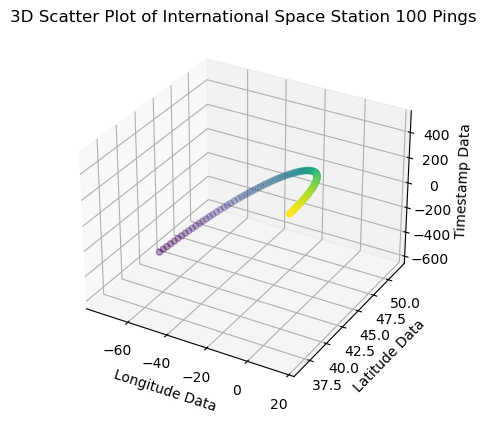

In [2]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import requests
import numpy as np

latitude_list = []
longitude_list = []
timestamp_list = []

interval = 10
max_attempts = 3  

while len(latitude_list) <= 100:
    attempt = 1
    while attempt <= max_attempts:
        try:
            req = requests.get("http://api.open-notify.org/iss-now.json")
            if req.status_code == 200:
                data = req.json()
                latitude_list.append(float(data['iss_position']['latitude'])) #iss_position req.
                longitude_list.append(float(data['iss_position']['longitude']))
                timestamp_list.append(int(data['timestamp']))
                break  # Data retrieval is good, therefore break off the loop
            else:
                raise requests.HTTPError(req.status_code)
        except (requests.RequestException, requests.HTTPError) as e:
            print(f"Error occurred: {e}")
            if attempt == max_attempts:
                print(f"Max retry attempts reached. Exiting.")
                break
            print(f"Retrying in {interval} seconds...")
            time.sleep(interval)
            attempt += 1

    time.sleep(interval)

latitude_array = np.array(latitude_list) 
longitude_array = np.array(longitude_list)
timestamp_array = np.array(timestamp_list)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(longitude_array, latitude_array, timestamp_array, c=timestamp_array, cmap='viridis')

ax.set_xlabel('Longitude Data')
ax.set_ylabel('Latitude Data')
ax.set_zlabel('Timestamp Data')
ax.set_title('3D Scatter Plot of International Space Station 100 Pings')

plt.show()
